# Exercise 1: Familiarize yourself with `pandas`

Skills: 
* `pandas` is one of the base Python packages for working with tabular data.
* Do some grouping and aggregation. Many ways to do this!
* Export to Google Cloud Storage
* Practice committing on GitHub

References: 
* https://docs.calitp.org/data-infra/analytics_new_analysts/data-analysis-intro.html
* https://docs.calitp.org/data-infra/analytics_tools/saving_code.html
* https://docs.calitp.org/data-infra/analytics_examples/warehouse_tutorial.html

In [218]:
from siuba import *
from siuba.data import mtcars

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Groupby / Aggregation

* By cylinder categories, calculate the average mpg and find difference between max and min weight.
* Hint: for `pandas`: `groupby / agg`, `pivot_table`, `groupby / transform`
* Hint: for `siuba`: `groupby`, `summarize`

In [62]:
#Average mpg

print(f"The average mpg is {mtcars.mpg.mean()}.")
print(f"The difference between max and min weight is {mtcars.wt.max() - mtcars.wt.min()}.")

The average mpg is 20.090624999999996.
The difference between max and min weight is 3.9110000000000005.


## Functions

* Create a new column using a lambda function and tag 6 cylinder values with "six", and all other values as "other"
* Write a function that tags each cylinder value with the word (ex: 6 as "six", 8 as "eight")

In [236]:
# View type
# type(mtcars)

# Create new df
mtcars2 = mtcars

# Create new column with cylinders as a string
mtcars2["cylinder_flag1"] = mtcars.apply(lambda x: "six" if (x.cyl == 6)
                else "other", axis = 1)

mtcars2.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,cylinder_flag1
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,six
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,six
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,other
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,six
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,other


In [237]:
# Define function cylinder_word to convert numeric 'cyl' column to text
def cylinder_word(df):
    if (df.cyl == 4):
            return 'four'
    if (df.cyl == 6):
            return 'six'
    elif (df.cyl == 8):
            return 'eight'
        
function_tag = mtcars2.apply(cylinder_word, axis=1)

function_tag.head()

0      six
1      six
2     four
3      six
4    eight
dtype: object

## Export to Google Cloud Storage (GCS)

* Make sure credential works
* Use this path: "gs://calitp-analytics-data/data-analyses/FILENAME"
* Export using `df.to_parquet()` and `df.to_csv()`

In [242]:
# Removed files after running from GCS
mtcars2.to_parquet('gs://calitp-analytics-data/data-analyses/example_report/practice_exercise1_Julia.ipynb')
mtcars2.to_csv('gs://calitp-analytics-data/data-analyses/example_report/practice_exercise1_Julia.csv')

## Make a chart

* Read in the parquet file from GCS.
* Make a visualization using one of the charting packages.
* Name this notebook `YOURNAME_exercise1.ipynb`
    * If you need to rename because you already named it, do it within the terminal.
    * `git mv OLDNAME.ipynb NEWNAME.ipynb`. 
    * The `mv` stands for move, and renaming a file is basically "moving" its path. Doing it this way retains the git history associated with the notebook. If you rename directly with right click, rename, you destroy the git history.
* Use a descriptive commit message (ex: adding chart, etc). GitHub already tracks who makes the commit, the date, the timestamp of it, the files being affected, so your commit message should be more descriptive than the metadata already stored.

In [244]:
pd.read_parquet('gs://calitp-analytics-data/data-analyses/example_report/practice_exercise1_Julia.ipynb').head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,cylinder_flag1
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,six
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,six
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,other
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,six
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,other


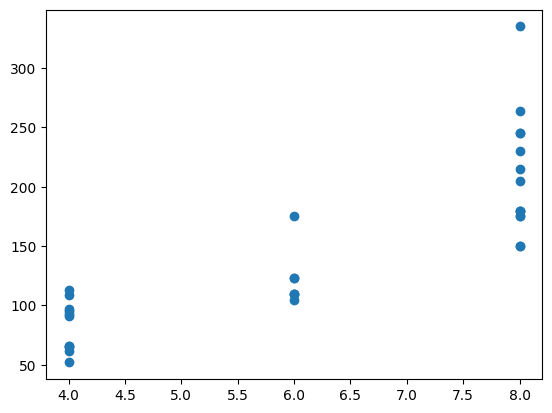

In [252]:
# Scatterplot of horsepower by cylinders
plt.scatter(mtcars2.cyl, mtcars2.hp)